# 1. Introduction

Goals
- can we learn anything about bees by data analysis
- can we observe population trends in bumblebee across the years
- can we observe any yearly trends
- can we observe any seasonal trends
- can we learn something about contributor patterns


Illinois, Missouri, Ohio, and Indiana
- photographs are encouraged to be taken at the same spots each "biological" year
- at least one photo of a bee in each submission
- one submission for each bee spotted
- each submission can have multiple photos of the same bee
- 12 identified bee types, honey bee, Apis mellifera, plus the 11 bumble bee species (Bombus spp.)
- bees are identified by experts based on features

- focus on affinis

Bumblebee watch has a restricted api and their database resource page lacked display options (limited to 10 results at a time) 
life span of honeybee: 30-60days
life span of bumblebee: 30- days

In [444]:
import pandas as pd

# load example from data set
data = pd.read_csv("Identified Bees (batch 1).csv")
display(data.tail())

,Spotting ID,Bee Spotter,Date Added to Site,Year Added to Site,Month Added to Site,Day Added to Site,Number of Days Between Site Launch and Date Added to Site,Title,Date Spotted,Year Spotted,...,Number of Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification (Primary),Expert Species Identification (Secondary),Protected Species?,Location Obscured?,Gender,Spotting URL
1453,2001,John Dahlstedt,10/17/2010,2010,10,17,1104,Bee 510 Champaign Cty,10/17/2010,2010,...,0,40.080033,-88.208306,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2001
1454,2002,John Dahlstedt,10/17/2010,2010,10,17,1104,Bee 511 Champaign Cty,10/17/2010,2010,...,0,40.079980,-88.208343,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2002
1455,2003,John Dahlstedt,10/17/2010,2010,10,17,1104,Bee 512 Champaign Cty,10/17/2010,2010,...,0,40.080038,-88.208319,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2003
1456,2009,JEKamper22,2/21/2011,2011,2,21,1231,mating bees,10/21/2010,2010,...,123,41.672796,-87.994401,Bombus variabilis,Bombus impatiens,NaN,f,f,both,https://beespotter.org/bee/2009
1457,2006,John Dahlstedt,11/1/2010,2010,11,1,1119,Bee 513 Champaign Cty,11/1/2010,2010,...,0,40.079861,-88.208354,Apis mellifera,Apis mellifera,NaN,f,f,female,https://beespotter.org/bee/2006


# 2. Preprocessing

In [445]:

# import libraries for preprocessing
import numpy as np
import pandas as pd


# load data from all batches
data = pd.concat([
    pd.read_csv(f"Identified Bees (batch {i}).csv") for i in range(1,6)
])

# examine the raw data
display(data)
display(data.info())

,Spotting ID,Bee Spotter,Date Added to Site,Year Added to Site,Month Added to Site,Day Added to Site,Number of Days Between Site Launch and Date Added to Site,Title,Date Spotted,Year Spotted,...,Number of Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification (Primary),Expert Species Identification (Secondary),Protected Species?,Location Obscured?,Gender,Spotting URL
0,1092,Gretchen,1/24/2009,2009,1,24,473,Bee in DeKalb,6/20/2003,2003,...,2045,41.91835,-88.758957,NaN,Apis mellifera,NaN,f,f,NaN,https://beespotter.org/bee/1092
1,132,bmovie,11/22/2007,2007,11,22,44,Tomato Garden Bee,9/2/2004,2004,...,1176,38.547259,-90.017939,NaN,Bombus impatiens,NaN,f,f,NaN,https://beespotter.org/bee/132
2,327,aurthur2sheds,6/26/2008,2008,6,26,261,map_test_trial,7/12/2005,2005,...,1080,40.332716,-88.767965,NaN,Bombus griseocollis,NaN,f,f,female,https://beespotter.org/bee/327
3,403,HaarFager,7/7/2008,2008,7,7,272,Bombus Impatiens 1,4/19/2006,2006,...,810,37.980672,-88.332653,NaN,Bombus impatiens,NaN,f,f,female,https://beespotter.org/bee/403
4,213,CityEcology,5/2/2008,2008,5,2,206,BB 20060504,5/4/2006,2006,...,729,39.307206,-76.552391,Bombus impatiens,Bombus impatiens,NaN,f,f,NaN,https://beespotter.org/bee/213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,14017,patpat36,7/4/2023,2023,7,4,5747,July 4 #2,7/4/2023,2023,...,0,39.9337016,-91.38244987,NaN,Bombus griseocollis,NaN,f,f,male,https://beespotter.org/bee/14017
184,14018,patpat36,7/4/2023,2023,7,4,5747,July 4 #3,7/4/2023,2023,...,0,39.93413888,-91.38187408,NaN,Bombus griseocollis,NaN,f,f,male,https://beespotter.org/bee/14018
185,14019,lilyaceae,7/4/2023,2023,7,4,5747,Not sure if it is a bumble bee,7/4/2023,2023,...,0,37.71513766,-89.02798477,NaN,Bombus auricomus,NaN,f,f,female,https://beespotter.org/bee/14019
186,14027,Holly,7/4/2023,2023,7,4,5747,Brown belted,7/4/2023,2023,...,0,41.69825612,-87.72558879,Bombus affinis,Bombus griseocollis,NaN,f,f,female,https://beespotter.org/bee/14027


<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 187
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Spotting ID                                                 10272 non-null  int64 
 1   Bee Spotter                                                 10272 non-null  object
 2   Date Added to Site                                          10272 non-null  object
 3   Year Added to Site                                          10272 non-null  int64 
 4   Month Added to Site                                         10272 non-null  int64 
 5   Day Added to Site                                           10272 non-null  int64 
 6   Number of Days Between Site Launch and Date Added to Site   10272 non-null  int64 
 7   Title                                                       10270 non-null  object
 8   Date Spotted 

None

In [446]:
# drop redundant columns
drop_columns = ['Year Added to Site',
                'Month Added to Site',
                'Day Added to Site',
                'Location Obscured?',
                'Number of Days Between Site Launch and Date Added to Site',
                'Title',
                'Number of Days Between Site Launch and Date Spotted',
                'Expert Species Identification (Secondary)',
                'Spotting URL']
data = data.drop(drop_columns, axis=1)

# rename columns to shortener strings
data = data.rename(columns={"Number of Days Between Date Spotted and Date Added to Site": "Days Between Date Spotted and Date Added to Site", 
                            "Expert Species Identification (Primary)": "Expert Species Identification",
                            "Protected Species?":"Protected Species"})
data.columns

Index(['Spotting ID', 'Bee Spotter', 'Date Added to Site', 'Date Spotted',
       'Year Spotted', 'Month Spotted', 'Day Spotted',
       'Days Between Date Spotted and Date Added to Site', 'Latitude',
       'Longitude', 'Amateur Species Identification',
       'Expert Species Identification', 'Protected Species', 'Gender'],
      dtype='object')

In [447]:
#find missing values in important columns
print(data['Expert Species Identification'].isna().sum())
print(data['Year Spotted'].isna().sum())
print(data['Latitude'].isna().sum())
print(data['Longitude'].isna().sum())

0
0
120
120


In [448]:
#find duplicates
print(data.duplicated().sum())
if data.duplicated().sum():
    data[data.duplicated()]


0


In [449]:
# if day count is 0, it is likely multiple bees were submitted on the same day

data['Days Between Date Spotted and Date Added to Site'] = np.maximum(data['Days Between Date Spotted and Date Added to Site'], 0)
data['Days Between Date Spotted and Date Added to Site'].value_counts()

# data

Days Between Date Spotted and Date Added to Site
0       3761
1       1646
2        756
3        466
4        365
        ... 
206        1
668        1
1023       1
319        1
2045       1
Name: count, Length: 333, dtype: int64

In [450]:
# convert protected species 't'/'f' to True/False
data['Protected Species'] = data['Protected Species'].replace({'t': True, 'f': False})
data['Protected Species'].value_counts()

Protected Species
False    9963
True      309
Name: count, dtype: int64

In [451]:
# convert date columns into pandas datetime object
# will be easier to make time series visualization
data['Date Added to Site'] = pd.to_datetime(data['Date Added to Site'])
data['Date Spotted'] = pd.to_datetime(data['Date Spotted'])
data.iloc[:,2:4]

,Date Added to Site,Date Spotted
0,2009-01-24,2003-06-20
1,2007-11-22,2004-09-02
2,2008-06-26,2005-07-12
3,2008-07-07,2006-04-19
4,2008-05-02,2006-05-04
...,...,...
183,2023-07-04,2023-07-04
184,2023-07-04,2023-07-04
185,2023-07-04,2023-07-04
186,2023-07-04,2023-07-04


## Feature Engineering


In [436]:
# find non numbers
print(data['Latitude'].isna().sum())

# replace non-geocoordinates with nan
# specific indexes that had issues running in the cell below
print(data.iloc[10130, 8:10]) # invalid coord
print(data.iloc[10131, 8:10])
data.iloc[10130, 8:10] = np.nan
data.iloc[10131, 8:10] = np.nan



# convert all values to float, some are str
data['Latitude'] = data['Latitude'].astype('float')
data['Longitude'] = data['Longitude'].astype('float')

120
Latitude     0.013512
Longitude   -0.113303
Name: 1567, dtype: object
Latitude     0.035994
Longitude    0.113138
Name: 2183, dtype: object
Latitude     V76W+95J Chicago, Illinois
Longitude    V76W+95J Chicago, Illinois
Name: 46, dtype: object
Latitude     V76W+95J Chicago, Illinois
Longitude    V76W+95J Chicago, Illinois
Name: 47, dtype: object


In [357]:
# find state/country by geo coordinates and append to table
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="user_agent")
# add rate limit
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

locations = []
length = len(data['Latitude'].values)

# algorithm to get coordinates from dataframe and find relevant state
# write dump log to 'geodump.text', around 3h to finish
with open('geo_log.txt', 'w') as f:
    for i in range(length):
        latitude = data['Latitude'].values[i]                  # get lat/long from df
        longitude = data['Longitude'].values[i]
        f.write(f'{i} - {latitude} {longitude} ')
        
        # check coordinates are reasonably around US
        if latitude < 10 or longitude > -10: 
            b = True
        else: 
            b = False
        
        # check lat/log is not NaN
        if not np.isnan(latitude) and not np.isnan(longitude) and not b:
            coord = [latitude, longitude]
            location = reverse(coord, addressdetails=True)     # pass in api with rate limit
            state = location.raw["address"].get("state")       # get state from full address
            locations.append(state)                            # append to locations
            # print(location)
            #f.write(f'{location}\n')
            try:
                f.write(f'{state}\n')                          # write returned state to log
            except:
                print(f'bad address: {state}')
                f.write(f'bad address\n')                      # if failed, encountered bad address
                locations.append(np.nan)
        else:
            f.write(f'bad coordinates, did not geolocate\n')
            locations.append(np.nan)

    f.write(f'counts: {pd.DataFrame(locations).value_counts()}')

# create locations column
# if len(locations) == length: # overwrite safety check
data['State'] = locations
display(pd.DataFrame(locations).value_counts())
# save csv with new columns
data.to_csv('Cleaned_BeeSpotter_Data.csv',index=False)
"""
Illinois            8817
Missouri             625
Ohio                 403
Indiana              169
Wisconsin             17
Minnesota             16
Maryland              11
Michigan               9
Iowa                   9
Texas                  7
California             6
Kentucky               6
Kansas                 5
Pennsylvania           4
New York               4
Tennessee              2
Virginia               2
North Carolina         2
Ontario                2
South Carolina         1
West Virginia          1
Alabama                1
Nova Scotia            1
Nebraska               1
Arizona                1
Georgia                1
Florida                1
Colorado               1
British Columbia       1
Mississippi            1
Name: count, dtype: int64
"""


In [441]:
print(len(locations))
display(data)

,Spotting ID,Bee Spotter,Date Added to Site,Date Spotted,Year Spotted,Month Spotted,Day Spotted,Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification,Protected Species,Gender
0,1092,Gretchen,2009-01-24,2003-06-20,2003,6,20,2045,41.918350,-88.758957,NaN,Apis mellifera,False,NaN
1,132,bmovie,2007-11-22,2004-09-02,2004,9,2,1176,38.547259,-90.017939,NaN,Bombus impatiens,False,NaN
2,327,aurthur2sheds,2008-06-26,2005-07-12,2005,7,12,1080,40.332716,-88.767965,NaN,Bombus griseocollis,False,female
3,403,HaarFager,2008-07-07,2006-04-19,2006,4,19,810,37.980672,-88.332653,NaN,Bombus impatiens,False,female
4,213,CityEcology,2008-05-02,2006-05-04,2006,5,4,729,39.307206,-76.552391,Bombus impatiens,Bombus impatiens,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,14017,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.933702,-91.382450,NaN,Bombus griseocollis,False,male
184,14018,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.934139,-91.381874,NaN,Bombus griseocollis,False,male
185,14019,lilyaceae,2023-07-04,2023-07-04,2023,7,4,0,37.715138,-89.027985,NaN,Bombus auricomus,False,female
186,14027,Holly,2023-07-04,2023-07-04,2023,7,4,0,41.698256,-87.725589,Bombus affinis,Bombus griseocollis,False,female


# 3. Visualization

From this point one, we will import and use the "`Cleaned_BeeSpotter_Data.csv`"

In [1]:
# import libraries for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up seaborn theme
sns.set_theme(style="darkgrid")

# read data from cleaned csv
data = pd.read_csv(f"./Cleaned_BeeSpotter_Data.csv")

# examine data from csv
display(data)
data.info()

,Spotting ID,Bee Spotter,Date Added to Site,Date Spotted,Year Spotted,Month Spotted,Day Spotted,Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification,Protected Species,Gender
0,1092,Gretchen,2009-01-24,2003-06-20,2003,6,20,2045,41.918350,-88.758957,NaN,Apis mellifera,False,NaN
1,132,bmovie,2007-11-22,2004-09-02,2004,9,2,1176,38.547259,-90.017939,NaN,Bombus impatiens,False,NaN
2,327,aurthur2sheds,2008-06-26,2005-07-12,2005,7,12,1080,40.332716,-88.767965,NaN,Bombus griseocollis,False,female
3,403,HaarFager,2008-07-07,2006-04-19,2006,4,19,810,37.980672,-88.332653,NaN,Bombus impatiens,False,female
4,213,CityEcology,2008-05-02,2006-05-04,2006,5,4,729,39.307206,-76.552391,Bombus impatiens,Bombus impatiens,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,14017,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.933702,-91.382450,NaN,Bombus griseocollis,False,male
10268,14018,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.934139,-91.381874,NaN,Bombus griseocollis,False,male
10269,14019,lilyaceae,2023-07-04,2023-07-04,2023,7,4,0,37.715138,-89.027985,NaN,Bombus auricomus,False,female
10270,14027,Holly,2023-07-04,2023-07-04,2023,7,4,0,41.698256,-87.725589,Bombus affinis,Bombus griseocollis,False,female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Spotting ID                                       10272 non-null  int64  
 1   Bee Spotter                                       10272 non-null  object 
 2   Date Added to Site                                10272 non-null  object 
 3   Date Spotted                                      10272 non-null  object 
 4   Year Spotted                                      10272 non-null  int64  
 5   Month Spotted                                     10272 non-null  int64  
 6   Day Spotted                                       10272 non-null  int64  
 7   Days Between Date Spotted and Date Added to Site  10272 non-null  int64  
 8   Latitude                                          10148 non-null  float64
 9   Longitude        

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


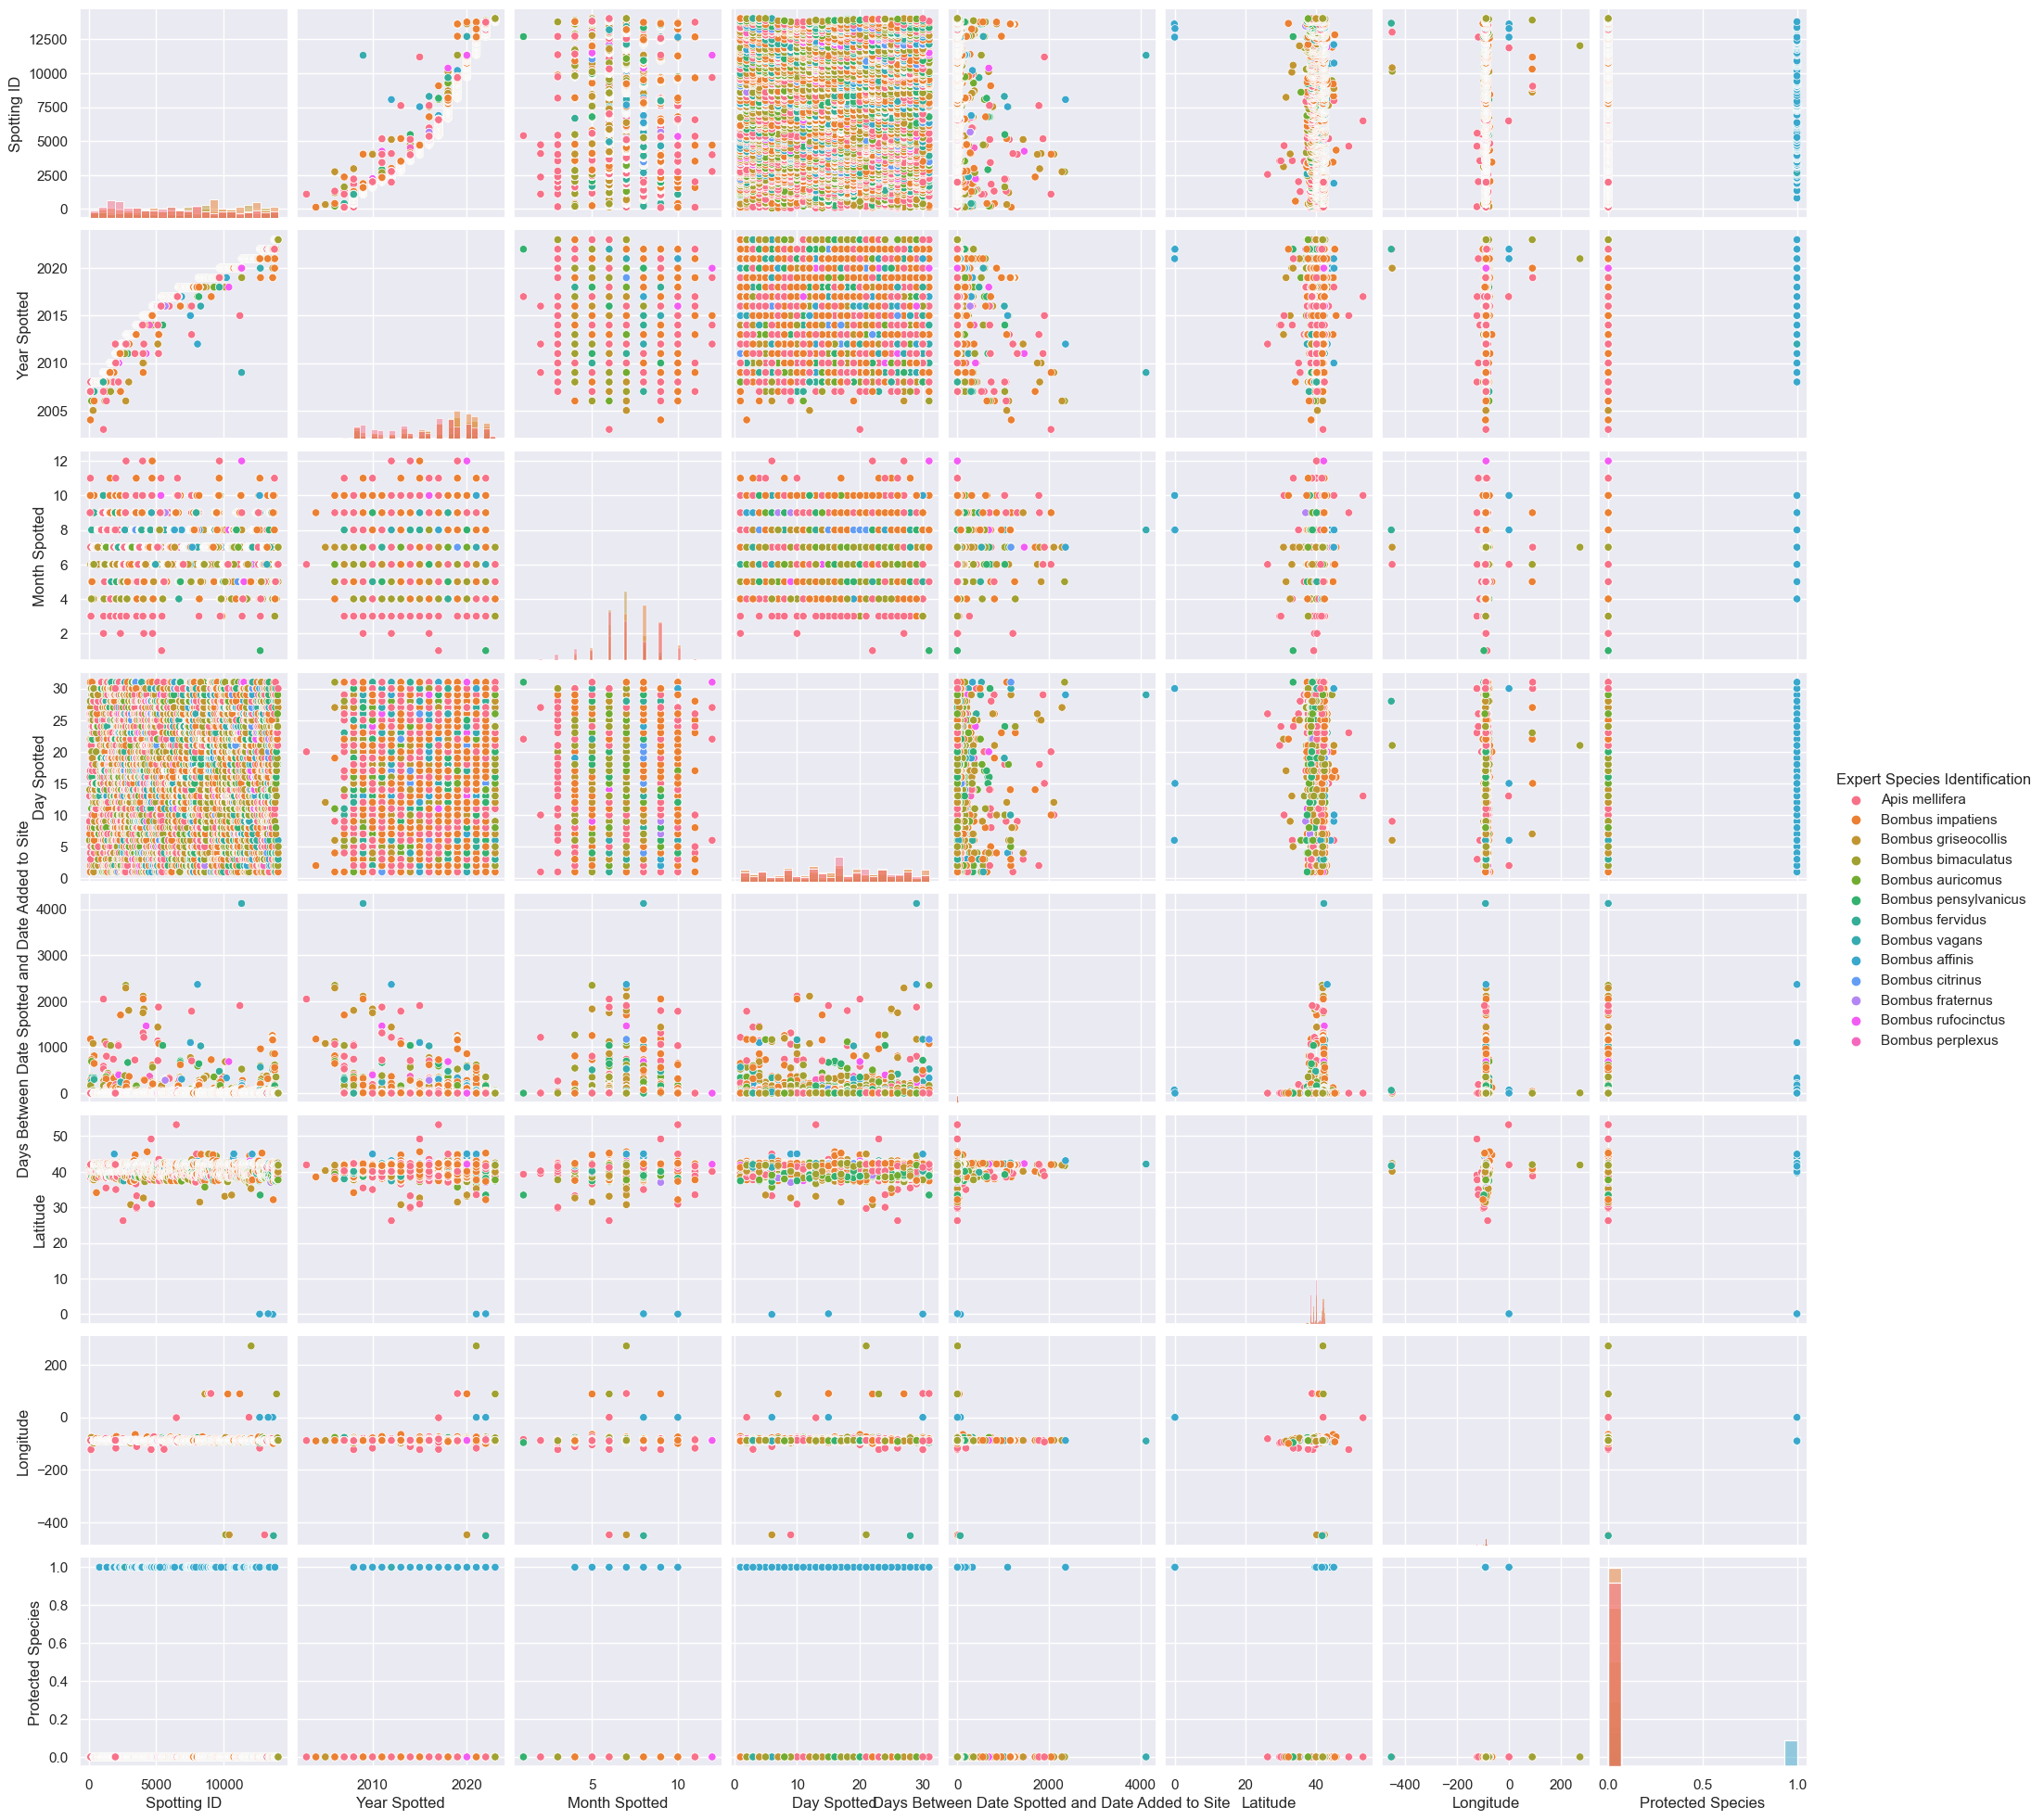

In [180]:
sns.pairplot(data,
             hue='Expert Species Identification', 
             diag_kind="hist")

11317 is an outlier `11317	kzfisherman	2020-12-12	2009-08-29	2009	8	29	4123	42.14999557	-90.16314698	Bombus affinis	Bombus vagans	FALSE`	

Text(0.5, 1.0, 'hello')

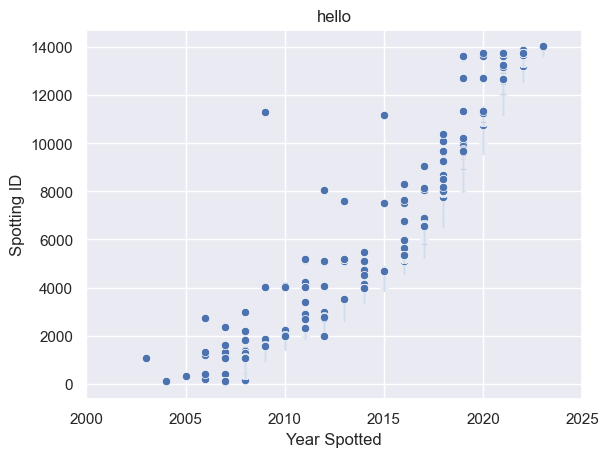

In [355]:
# year spotted and spotting id
x = data['Year Spotted']
y = data['Spotting ID']

g=sns.scatterplot(data=data, x='Year Spotted', y='Spotting ID')
g.set_xlim([2000,2025])
plt.title('hello')

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

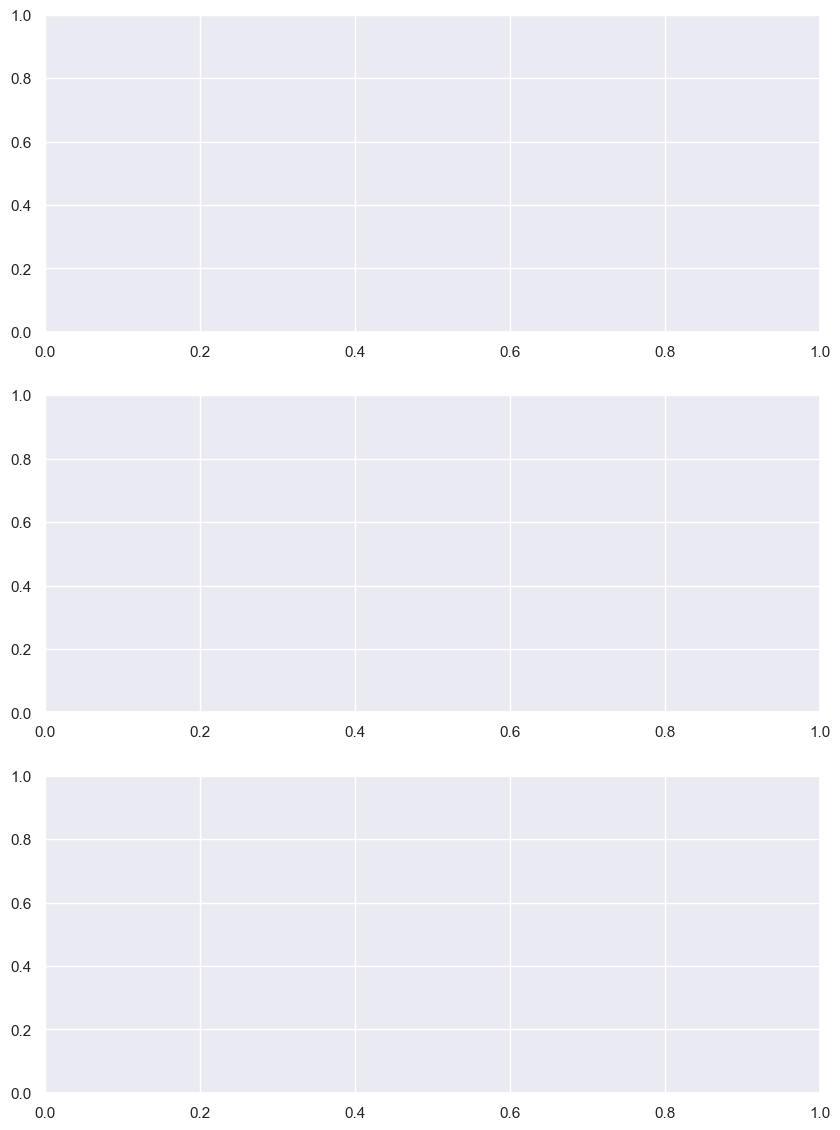

In [352]:
fig, axes =  plt.subplots(3, 1, figsize=(10, 14))
sns.countplot(data, x=data['Year Spotted'], ax=axes[0], hue="Gender")
sns.countplot(data, x=data['Month Spotted'], ax=axes[1], hue="Gender")
sns.countplot(data, x=data['Day Spotted'], ax=axes[2], hue="Gender")
fig.suptitle('hello')
fig.tight_layout()

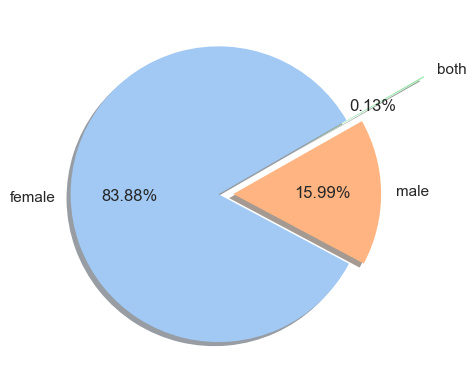

Gender
female    7720
male      1472
both        12
Name: count, dtype: int64


In [273]:

colors = sns.color_palette('pastel')
labels = data['Gender'].unique()[1:4]

plt.pie(data['Gender'].value_counts(),
        autopct="%.2f%%",
        labels=labels, 
        shadow=True,
        explode=[0,0.1,0.6],
        colors=colors,
        startangle=30,
        wedgeprops={"edgecolor":"w",'linewidth': 0})

# displaying chart
plt.show()

print(data['Gender'].value_counts())



['Apis mellifera' 'Bombus impatiens' 'Bombus griseocollis'
 'Bombus bimaculatus' 'Bombus auricomus' 'Bombus pensylvanicus'
 'Bombus fervidus' 'Bombus vagans' 'Bombus affinis' 'Bombus citrinus'
 'Bombus fraternus']


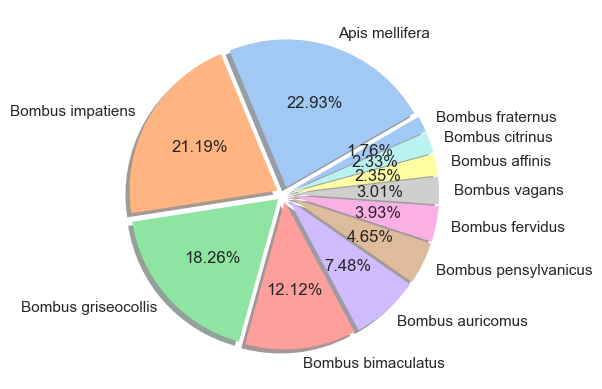

Expert Species Identification
Bombus impatiens        2348
Apis mellifera          2170
Bombus griseocollis     1870
Bombus bimaculatus      1241
Bombus auricomus         766
Bombus fervidus          476
Bombus pensylvanicus     402
Bombus affinis           308
Bombus rufocinctus       241
Bombus vagans            239
Bombus citrinus          180
Bombus fraternus          24
Bombus perplexus           7
Name: count, dtype: int64


In [274]:
# change colour


labels = data['Expert Species Identification'].unique()[:11]
print(labels)
explode = [0.05] * 11

plt.pie(data['Expert Species Identification'].value_counts()[:11],
        autopct="%.2f%%",
        labels=labels, 
        shadow=True,
        explode=explode,
        colors=colors,
        startangle=30,
        wedgeprops={"edgecolor":"w",'linewidth': 0})
  
# displaying chart
plt.show()
print(data['Expert Species Identification'].value_counts())


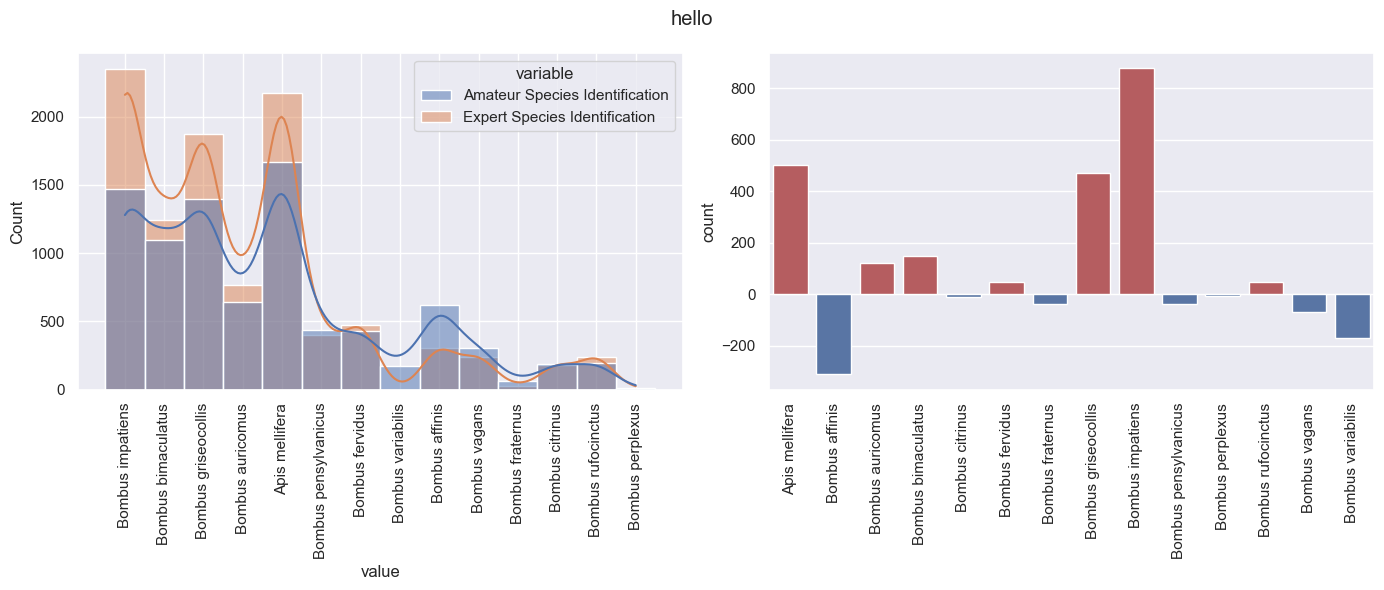

In [353]:
# melt together two columns into new df
df_plot = pd.melt(data.iloc[:,10:12])
amateur = data['Amateur Species Identification'].value_counts()
expert = data['Expert Species Identification'].value_counts()
id_diff = expert - amateur
id_diff[-1] = -170

id_diff2 = pd.DataFrame(id_diff)
colors = ['r' if c >= 0 else 'b' for c in id_diff]

fig, axes =  plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_plot, x='value', hue='variable', ax=axes[0], kde=True)
sns.barplot(id_diff2, x=id_diff2.index, y='count',palette=colors, ax=axes[1])

fig.autofmt_xdate(rotation=90, ha='center')
fig.suptitle('hello')
fig.tight_layout()


<Axes: xlabel='Month Spotted', ylabel='Expert Species Identification'>

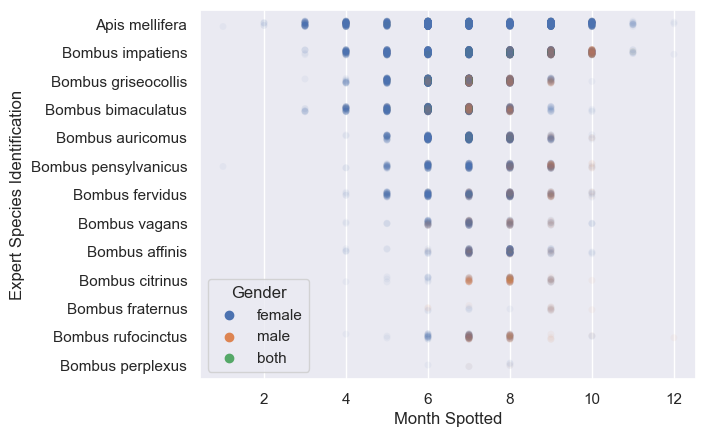

In [346]:
sns.stripplot(data, x="Month Spotted", y="Expert Species Identification", hue="Gender", alpha=0.05)

In [356]:
data

,Spotting ID,Bee Spotter,Date Added to Site,Date Spotted,Year Spotted,Month Spotted,Day Spotted,Days Between Date Spotted and Date Added to Site,Latitude,Longitude,Amateur Species Identification,Expert Species Identification,Protected Species,Gender
0,1092,Gretchen,2009-01-24,2003-06-20,2003,6,20,2045,41.918350,-88.758957,NaN,Apis mellifera,False,NaN
1,132,bmovie,2007-11-22,2004-09-02,2004,9,2,1176,38.547259,-90.017939,NaN,Bombus impatiens,False,NaN
2,327,aurthur2sheds,2008-06-26,2005-07-12,2005,7,12,1080,40.332716,-88.767965,NaN,Bombus griseocollis,False,female
3,403,HaarFager,2008-07-07,2006-04-19,2006,4,19,810,37.980672,-88.332653,NaN,Bombus impatiens,False,female
4,213,CityEcology,2008-05-02,2006-05-04,2006,5,4,729,39.307206,-76.552391,Bombus impatiens,Bombus impatiens,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,14017,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.933702,-91.382450,NaN,Bombus griseocollis,False,male
10268,14018,patpat36,2023-07-04,2023-07-04,2023,7,4,0,39.934139,-91.381874,NaN,Bombus griseocollis,False,male
10269,14019,lilyaceae,2023-07-04,2023-07-04,2023,7,4,0,37.715138,-89.027985,NaN,Bombus auricomus,False,female
10270,14027,Holly,2023-07-04,2023-07-04,2023,7,4,0,41.698256,-87.725589,Bombus affinis,Bombus griseocollis,False,female


In [ ]:
# users

In [ ]:
# world map?
# with states or geolocation

In [ ]:
# some rel with protected species

# 4. Conclusion

Improvements:
- one-hot encode more data into numerical, but would create too many columns of data
    - maybe separate each of these into their own csv or dataframe and examine separately

# References
https://royalsocietypublishing.org/doi/10.1098/rsbl.2018.0670
https://jhr.pensoft.net/article/47828/element/8/62850//
https://operations.osmfoundation.org/policies/nominatim/